   # This project aims to analyse the last FIFA game FIFA 23.

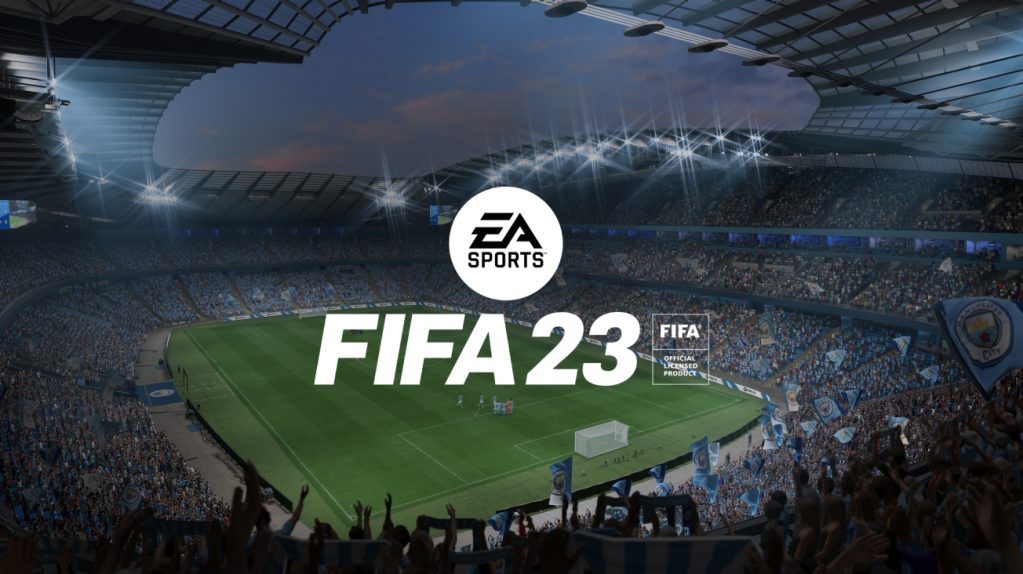

#### - Importing numpy, pandas and our dataset which has taken from kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fifa23.csv")
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


* We have 89 columns(there are so many). Let's see what they are. 

In [3]:
df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

#### - Our first impression is that we can build a regression model which will take 7 inputs (Pace, Shooting, Passing, Dribbling, Defending, Physicality and Position) and will try to predict what is the overall rating player has.

In [4]:
df2 = df[["Pace Total", "Shooting Total", "Passing Total", "Dribbling Total", "Defending Total", "Physicality Total",
          "Best Position", "Overall"]]
df2.head()

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Best Position,Overall
0,81,89,90,94,34,64,CAM,91
1,80,88,83,87,39,78,CF,91
2,75,91,79,86,44,83,ST,91
3,74,88,93,87,64,77,CM,91
4,97,89,80,92,36,76,ST,91


* Our dataset is more clear and understandable right now.

#### - If we want to learn mean pace values by positions, we can do this.  

In [5]:
df3 = round(df2.groupby(["Best Position"])["Pace Total"].mean())
pd.DataFrame(df3).sort_values(by="Pace Total")

,Pace Total
Best Position,
CB,60.0
CDM,61.0
CM,64.0
GK,65.0
CAM,70.0
ST,70.0
LB,73.0
RB,73.0
CF,74.0


* As expected, the slowest players are centre backs and the fastest ones are wingers

#### - In our model, we do not need goalkeepers because they have some other parameters to determine their overall ratings. So we will extract from our data frame

In [6]:
df4 = df2[df2["Best Position"] != "GK"]

#### - Let's examine the distribution our variables seperately

In [7]:
from scipy.stats import skew, kurtosis

#### - First let's start with overall rating

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Overall -- Skewness: 0.1')]

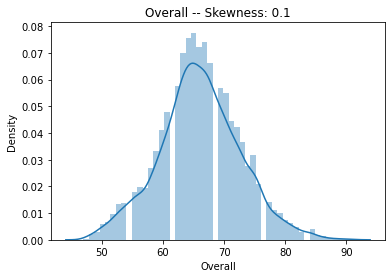

In [8]:
sns.distplot(df4["Overall"]).set(title="Overall -- Skewness: {}".format(round(skew(df4["Overall"]),1)))

* It s almost a normal distribution

#### - Let's look other 6 numeric variables

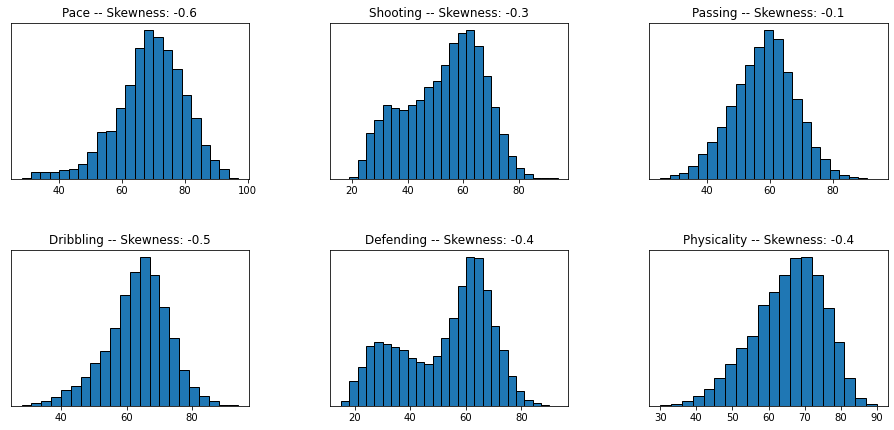

In [9]:
fig, ax = plt.subplots(2,3, figsize=(14, 7))
fig.tight_layout(pad=5.0)
binwidth = 3

def hist_for_all(variable, x, y):
    ax[x,y].hist(df4[variable], bins=range(min(df4[variable]), max(df4[variable]) + binwidth, binwidth), edgecolor="black")
    ax[x,y].set_title(variable[:-6] + " -- Skewness: " + str(round(skew(df4[variable]),1)))
    ax[x,y].get_yaxis().set_visible(False)
    
hist_for_all("Pace Total", 0, 0)
hist_for_all("Shooting Total", 0, 1)
hist_for_all("Passing Total", 0, 2)
hist_for_all("Dribbling Total", 1, 0)
hist_for_all("Defending Total", 1, 1)
hist_for_all("Physicality Total", 1, 2)

* Their skewnesses are not much enough to say they are not normally distributed
* Skewness between (-0.5, 0.5) means it is close to normal distribution
* Skewness = 0 means exact normal distribution

* Our graphs looks normally distributed and we prove it by using skewness value.
* So we can remove outliers using empirical relations (mean - 3*std)

In [10]:
def detect_outliers(variable):
    upper_limit = df4[variable].mean() + 3*df4[variable].std()
    lower_limit = df4[variable].mean() - 3*df4[variable].std()
    
    temp_df = df4[(df4[variable] < lower_limit) | (df4[variable] > upper_limit)]
    return temp_df

In [11]:
out1 = detect_outliers("Pace Total")
out2 = detect_outliers("Shooting Total")
out3 = detect_outliers("Passing Total")
out4 = detect_outliers("Dribbling Total")
out5 = detect_outliers("Defending Total")
out6 = detect_outliers("Physicality Total")
out7 = detect_outliers("Overall")
print("Outliers from Pace Total: {}".format(len(out1)))
print("Outliers from Shooting Total: {}".format(len(out2)))
print("Outliers from Passing Total: {}".format(len(out3)))
print("Outliers from Dribbling Total: {}".format(len(out4)))
print("Outliers from Defending Total: {}".format(len(out5)))
print("Outliers from Physicality Total: {}".format(len(out6)))
print("Outliers from Overall: {}".format(len(out7)))
print("Total outliers: {}".format(len(out1) + len(out2) + len(out3) + len(out4) + len(out5) + len(out6) + len(out7)))
outliers = pd.concat([out1, out2, out3, out4, out5, out6, out7])

Outliers from Pace Total: 176
Outliers from Shooting Total: 0
Outliers from Passing Total: 19
Outliers from Dribbling Total: 81
Outliers from Defending Total: 0
Outliers from Physicality Total: 30
Outliers from Overall: 32
Total outliers: 338


In [12]:
outliers.head()

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Best Position,Overall
450,35,83,82,78,59,84,CM,80
451,31,46,62,62,82,80,CB,80
490,35,65,77,73,75,84,CDM,80
587,34,63,79,75,78,74,CDM,79
719,33,42,58,53,79,79,CB,78


In [13]:
dup = outliers[outliers.duplicated()]
print("Number of duplicates in outliers: {}".format(len(dup)))

Number of duplicates in outliers: 22


In [14]:
print("Number of data before removing duplicates from outliers: {}".format(len(outliers)))
new_out = outliers.drop_duplicates()
print("Number of data after removing duplicates from outliers: {}".format(len(new_out)))

Number of data before removing duplicates from outliers: 338
Number of data after removing duplicates from outliers: 316


* 338 - 22 = 316 successful process

In [15]:
print("Number of data before removing outliers from our data frame: {}".format(len(df4)))
df5 = df4.merge(new_out, how='left', indicator=True)
df5 = df5[df5['_merge'] == 'left_only']
print("Number of data after removing outliers from our data frame: {}".format(len(df5)))

Number of data before removing outliers from our data frame: 16478
Number of data after removing outliers from our data frame: 16162


* 16478 - 338 = 16162 successful process

#### - Our data frame after removing outliers

In [16]:
df6 = df5.reset_index().drop(["_merge", "index"], axis=1)
df6.head()

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Best Position,Overall
0,61,72,87,90,72,69,CM,86
1,85,87,68,80,39,75,ST,86
2,80,85,75,77,38,82,ST,86
3,79,71,83,80,85,77,CB,86
4,90,80,78,86,45,67,LW,86


#### - In this step, we deal with dummy variables. ML algorithms use numbers not strings or objects.

In [17]:
df7 = pd.get_dummies(df6, prefix = "", prefix_sep = "", drop_first = True)
df7.head()

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Overall,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,61,72,87,90,72,69,86,0,0,0,1,0,0,0,0,0,0,0,0,0
1,85,87,68,80,39,75,86,0,0,0,0,0,0,0,0,0,0,0,0,1
2,80,85,75,77,38,82,86,0,0,0,0,0,0,0,0,0,0,0,0,1
3,79,71,83,80,85,77,86,1,0,0,0,0,0,0,0,0,0,0,0,0
4,90,80,78,86,45,67,86,0,0,0,0,0,0,1,0,0,0,0,0,0


#### - Finally we can start split our dataset
* X = independent(predictor) variables
* y = dependent(target) variables

In [18]:
X = df7.drop("Overall", axis=1)
X.head()

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,61,72,87,90,72,69,0,0,0,1,0,0,0,0,0,0,0,0,0
1,85,87,68,80,39,75,0,0,0,0,0,0,0,0,0,0,0,0,1
2,80,85,75,77,38,82,0,0,0,0,0,0,0,0,0,0,0,0,1
3,79,71,83,80,85,77,1,0,0,0,0,0,0,0,0,0,0,0,0
4,90,80,78,86,45,67,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
y = df7["Overall"]
y.head()

0    86
1    86
2    86
3    86
4    86
Name: Overall, dtype: int64

#### - Splitting our data into train and test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle=True)

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
nrm = MinMaxScaler()
X_train_nrm = nrm.fit_transform(X_train)
X_test_nrm = nrm.transform(X_test)

In [22]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### - Building our very simple first model

In [23]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train_nrm, y_train)
lr1.score(X_test_nrm, y_test)

0.8140370539334607

In [24]:
lr2 = LinearRegression()
lr2.fit(X_train_sc, y_train)
lr2.score(X_test_sc, y_test)

0.8140370539334607

* Interestingly score of our model decreased by 0.002 before removing outliers.
* Not much difference so we need to try something different
* In the next notebook we will scale our data and see how our results vary.

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.9290708938814982

In [26]:
dtr_nrm = DecisionTreeRegressor()
dtr_nrm.fit(X_train_nrm, y_train)
dtr_nrm.score(X_test_nrm, y_test)

0.9281708661806289

In [27]:
dtr_sc = DecisionTreeRegressor()
dtr_sc.fit(X_train_sc, y_train)
dtr_sc.score(X_test_sc, y_test)

0.9299016886823006

In [28]:
dfrf = pd.get_dummies(df4, prefix = "", prefix_sep = "", drop_first = True)
dfrf.head()

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Overall,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,81,89,90,94,34,64,91,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80,88,83,87,39,78,91,0,0,1,0,0,0,0,0,0,0,0,0,0
2,75,91,79,86,44,83,91,0,0,0,0,0,0,0,0,0,0,0,0,1
3,74,88,93,87,64,77,91,0,0,0,1,0,0,0,0,0,0,0,0,0
4,97,89,80,92,36,76,91,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
Xrf = dfrf.drop("Overall", axis = 1)
Xrf.head()

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,81,89,90,94,34,64,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80,88,83,87,39,78,0,0,1,0,0,0,0,0,0,0,0,0,0
2,75,91,79,86,44,83,0,0,0,0,0,0,0,0,0,0,0,0,1
3,74,88,93,87,64,77,0,0,0,1,0,0,0,0,0,0,0,0,0
4,97,89,80,92,36,76,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
yrf = dfrf["Overall"]

In [31]:
XrfTr, XrfTs, yrfTr, yrfTs = train_test_split(Xrf, yrf, test_size = 0.2, random_state = 1, shuffle=True)

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(XrfTr,yrfTr)
rf.score(XrfTs, yrfTs)

0.9678435267615975

In [33]:
round(pd.DataFrame([lr1.coef_], columns=X.columns).T, 3)

,0
Pace Total,0.732
Shooting Total,4.410
Passing Total,11.361
Dribbling Total,22.279
Defending Total,5.699
Physicality Total,8.416
CB,7.066
CDM,0.690
CF,1.875
CM,-0.600


In [34]:
np.round(lr1.intercept_,3)

36.331

#### - This function will take inputs from user and predict the player's overall rating  

In [35]:
def predict_overall():
    pac = int(input("Pace: "))
    sho = int(input("Shooting: "))
    pas = int(input("Passing: "))
    dri = int(input("Dribbling: "))
    dep = int(input("Defending: "))
    phy = int(input("Physicality: "))
    pos = input("Position: ")
    
    position_array = [0]*13
    positions = X.columns[6:]
    valid_pos = True
    for p in range(len(positions)):
        if pos.upper() == positions[p]:
            position_array[p] = 1
            break
    if 1 not in position_array and pos.upper() != "CAM":
        valid_pos = False
        print("Position is not valid")        
    if valid_pos == True:
        ratings = [pac, sho, pas, dri, dep, phy]
        ratings.extend(position_array)
    
    return round(rf.predict([ratings])[0])

#### - Let's test it out our function with a random sample

In [36]:
df4.sample(10)

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Best Position,Overall
12517,62,56,65,68,57,66,CAM,63
2543,71,65,71,76,61,66,CM,73
17872,67,30,36,48,50,50,RWB,53
12427,52,33,50,52,62,73,CB,63
2654,83,69,68,75,37,57,CAM,73
6609,51,36,46,48,67,78,CB,68
14115,78,48,51,59,55,64,RWB,61
2186,67,63,70,72,75,80,CM,74
8631,63,58,62,63,64,81,CB,66
7688,75,49,60,67,64,57,CDM,67


In [39]:
df4[df4["Best Position"] == "CB"]

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Best Position,Overall
9,81,60,71,72,91,86,CB,90
20,63,39,66,68,88,88,CB,88
25,79,56,75,74,89,80,CB,88
30,82,53,71,67,86,85,CB,87
40,82,33,59,68,88,85,CB,87
...,...,...,...,...,...,...,...,...
18493,61,24,28,30,50,55,CB,49
18496,55,24,26,30,50,56,CB,48
18505,58,22,30,28,49,52,CB,48
18512,50,26,29,31,49,54,CB,48


In [41]:
predict_overall()

Pace: 65
Shooting: 82
Passing: 71
Dribbling: 76
Defending: 20
Physicality: 84
Position: st


80

In [42]:
predict_overall()

Pace: 65
Shooting: 82
Passing: 71
Dribbling: 76
Defending: 20
Physicality: 84
Position: cb


80

In [53]:
df4[df4["Best Position"] == "CB"]["Physicality Total"].mean()

71.3627665390924

(array([  6.,  11.,  30.,  53., 128.,  80.,  64.,  27.,  20.,   3.]),
 array([49. , 52.5, 56. , 59.5, 63. , 66.5, 70. , 73.5, 77. , 80.5, 84. ]),
 <BarContainer object of 10 artists>)

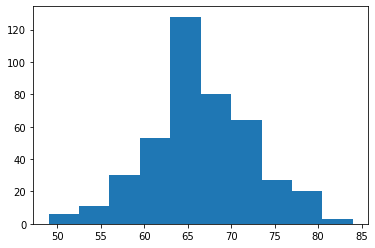

In [70]:
centre_backs = df4[df4["Best Position"] == "CB"]
plt.hist(df4[df4["Best Position"] == "RWB"]["Overall"])